In [7]:
import matplotlib.pyplot as plt
import corner, os, glob, json, time
import numpy as np
import pandas as pd
from scipy.constants import golden_ratio
%matplotlib inline

In [119]:
width = 3.36 # 242 pt
base_size = np.array([1, 1/golden_ratio])
fig_size = width * base_size

In [8]:
#Reference directory
topdir = os.getcwd()

cw_dir = topdir + '/CaitlinCW/final'

#Open 3b
cw_open_3b_dir_cw_noise = cw_dir + '/combo_open_3b_cwnoise'
#Still Running
cw_open_3b_dir_cw_noise_sampled = cw_dir + '/combo_open_3b_sample'
cw_open_3b_dir_wrong_noise = cw_dir + '/combo_open_3b_wrongnoise'

#Closed 1
cw_closed_1_dir = cw_dir + '/combo_closed1_cwnoise'
#Closed 2
cw_closed_2_dir = cw_dir + '/combo_closed2_cwnoise'
#Closed 3
cw_closed_3_dir = cw_dir + '/double_5_17'

#Where the truth values for the open datatset are
truthfile = topdir + '/mdc2/group1/group1_gw_parameters.json'
truthfile_closed = topdir + '/mdc2/group2/group2_gw_parameters.json'

# Load Chains

### Open 3b

In [9]:
chain_open_3b_cw_noise = pd.read_csv(cw_open_3b_dir_cw_noise + '/chain_1.txt', sep='\t', dtype=float, header=None).values
burn_open_3b_cw_noise = int(0.25 * chain_open_3b_cw_noise.shape[0])

chain_open_3b_cw_noise_sampled = pd.read_csv(cw_open_3b_dir_cw_noise_sampled + '/chain_1.txt', sep='\t', dtype=float, header=None).values
burn_open_3b_cw_noise_sampled = int(0.25 * chain_open_3b_cw_noise_sampled.shape[0])

chain_open_3b_wrong_noise = pd.read_csv(cw_open_3b_dir_wrong_noise + '/chain_1.txt', sep='\t', dtype=float, header=None).values
burn_open_3b_wrong_noise = int(0.25 * chain_open_3b_wrong_noise.shape[0])

In [10]:
print(np.shape(chain_open_3b_cw_noise))
print(np.shape(chain_open_3b_cw_noise_sampled))
print(np.shape(chain_open_3b_wrong_noise))

(199900, 79)
(199900, 145)
(199900, 79)


### Closed 1

In [11]:
chain_closed_1_cw_noise = pd.read_csv(cw_closed_1_dir + '/chain_1.txt', sep='\t', dtype=float, header=None).values
burn_closed_1_cw_noise = int(0.25 * chain_closed_1_cw_noise.shape[0])

In [12]:
print(np.shape(chain_closed_1_cw_noise))

(199900, 79)


### Closed 2

In [13]:
chain_closed_2_cw_noise = pd.read_csv(cw_closed_2_dir + '/chain_1.txt', sep='\t', dtype=float, header=None).values
burn_closed_2_cw_noise = int(0.25 * chain_closed_2_cw_noise.shape[0])

In [14]:
print(np.shape(chain_closed_2_cw_noise))

(199900, 79)


### Closed 3

In [15]:
chain_closed_3_double = pd.read_csv(cw_closed_3_dir + '/chain_1.txt', sep='\t', dtype=float, header=None).values
burn_closed_3_double = int(0.25 * chain_closed_3_double.shape[0])

In [16]:
print(np.shape(chain_closed_3_double))

(199900, 218)


# Load Params 

In [17]:
param_dict_open_3b_cw_noise = []
params_open_3b_cw_noise = cw_open_3b_dir_cw_noise + '/parameters.json'
with open(params_open_3b_cw_noise) as pf:
    param_dict_open_3b_cw_noise = json.load(pf)
    pf.close()

param_dict_open_3b_cw_noise_sampled = []
params_open_3b_cw_noise_sampled = cw_open_3b_dir_cw_noise_sampled + '/parameters.json'
with open(params_open_3b_cw_noise_sampled) as pf:
    param_dict_open_3b_cw_noise_sampled = json.load(pf)
    pf.close()

param_dict_open_3b_wrong_noise = []
params_open_3b_wrong_noise = cw_open_3b_dir_wrong_noise + '/parameters.json'
with open(params_open_3b_wrong_noise) as pf:
    param_dict_open_3b_wrong_noise = json.load(pf)
    pf.close()

#Closed 1
param_dict_closed_1_cw_noise = []
params_closed_1_cw_noise = cw_closed_1_dir + '/parameters.json'
with open(params_closed_1_cw_noise) as pf:
    param_dict_closed_1_cw_noise = json.load(pf)
    pf.close()
    
#Closed 2
param_dict_closed_2_cw_noise = []
params_closed_2_cw_noise = cw_closed_2_dir + '/parameters.json'
with open(params_closed_2_cw_noise) as pf:
    param_dict_closed_2_cw_noise = json.load(pf)
    pf.close()

#Closed 3 (Double)
param_dict_closed_3_double = []
params_closed_3_double = cw_closed_3_dir + '/parameters.json'
with open(params_closed_3_double) as pf:
    param_dict_closed_3_double = json.load(pf)
    pf.close()

In [18]:
#Load truth values for open dataset
with open(truthfile) as tf:
    truths = json.load(tf)
    tf.close()

truth_params_1b = []
truth_vals_1b = []
truth_params_2b = []
truth_vals_2b = []
truth_params_3b = {}
truth_vals_3b = []

for dataset, info in truths.items():
    for truth_params, truth_vals in info.items():
        if dataset == 'dataset1':
            truth_params_1b.append(truth_params)
            truth_vals_1b.append(truth_vals)
        if dataset == 'dataset2':
            truth_params_2b.append(truth_params)
            truth_vals_2b.append(truth_vals)
        if dataset == 'dataset3':
            truth_params_3b[truth_params] = truth_vals

In [19]:
print(truth_params_3b)
#print(param_dict_open_3b_cw_noise)

{'chirp_mass': 5000000000.0, 'distance': 65, 'f_gw': 6.1e-09, 'gw_phi': 4.066617157146788, 'gw_theta': 1.4311699866353502, 'inclination': 0.4363323129985824, 'log_10_h': -13.350394182181965, 'phase0': 0.17453292519943295, 'psi': 0.6457718232379019}


In [57]:
#Load truth values for closed dataset
with open(truthfile_closed) as tfc:
    truths_closed = json.load(tfc)
    tfc.close()

truth_params_1 = {}
truth_params_2 = {}
truth_params_3 = {}

for dataset, info in truths_closed.items():
    for truth_params, truth_vals in info.items():
        if dataset == 'dataset1':
            truth_params_1[truth_params] = truth_vals
        if dataset == 'dataset2':
            truth_params_2[truth_params] = truth_vals
        if dataset == 'dataset3':
            truth_params_3[truth_params] = truth_vals

In [58]:
print(truth_params_3)
#print(param_dict_open_3b_cw_noise)

{'source_1': {'chirp_mass': 2000000000.0, 'distance': 121, 'f_gw': 1.8e-08, 'gw_phi': 0.5934119456780721, 'gw_theta': 2.111848394913139, 'inclination': 0.3036872898470133, 'log_10_h': -13.970204430247263, 'phase0': 4.625122517784973, 'psi': 1.3264502315156905}, 'source_2': {'chirp_mass': 910000000.0, 'distance': 85, 'f_gw': 2.4e-09, 'gw_phi': 4.276056667386108, 'gw_theta': 1.4049900478554354, 'inclination': 1.5079644737231008, 'log_10_h': -14.970193166811052, 'phase0': 3.3335788713091694, 'psi': 0.7330382858376184}}


In [22]:
all_cw_params = ['cos_gwtheta', 'cos_inc', 'gwb_log10_A', 'gwphi', 'log10_fgw', 'log10_h', 'log10_mc', 'phase0', 'psi']
cw_params = ['gw_theta', 'gw_phi', 'inclination', 'log_10_h', 'f_gw', 'chirp_mass']
printed_cw_params = [r'${\rm cos}(\theta_{GW})$',r'$\phi_{\rm GW}$',r'${\rm cos}(\iota)$',r'${\rm log}_{10}(h_{\rm GW})$',r'${\rm log}_{10}(f_{\rm GW})$',r'${\rm log}_{10}(\mathcal{M}_{\rm c})$']

In [29]:
truth_values_closed_2 = []
for param in cw_params:
    for key,value in truth_params_2.items():
        if key == param:
            if key == 'gw_theta':
                truth_values_closed_2.append(np.cos(value))
            elif key == 'inclination':
                truth_values_closed_2.append(np.cos(value))
            elif key == 'chirp_mass':
                truth_values_closed_2.append(np.log10(value))
            elif key == 'f_gw':
                truth_values_closed_2.append(np.log10(value))
            else:
                truth_values_closed_2.append(value)
                
truth_values_closed_3_1 = []
for param in cw_params:
    for key,value in truth_params_3['source_1'].items():
        if key == param:
            if key == 'gw_theta':
                truth_values_closed_3_1.append(np.cos(value))
            elif key == 'inclination':
                truth_values_closed_3_1.append(np.cos(value))
            elif key == 'chirp_mass':
                truth_values_closed_3_1.append(np.log10(value))
            elif key == 'f_gw':
                truth_values_closed_3_1.append(np.log10(value))
            else:
                truth_values_closed_3_1.append(value)
                
truth_values_closed_3_2 = []
for param in cw_params:
    for key,value in truth_params_3['source_2'].items():
        if key == param:
            if key == 'gw_theta':
                truth_values_closed_3_2.append(np.cos(value))
            elif key == 'inclination':
                truth_values_closed_3_2.append(np.cos(value))
            elif key == 'chirp_mass':
                truth_values_closed_3_2.append(np.log10(value))
            elif key == 'f_gw':
                truth_values_closed_3_2.append(np.log10(value))
            else:
                truth_values_closed_3_2.append(value)

In [32]:
truth_values = []
for param in cw_params:
    for key,value in truth_params_3b.items():
        if key == param:
            if key == 'gw_theta':
                truth_values.append(np.cos(value))
            elif key == 'inclination':
                truth_values.append(np.cos(value))
            elif key == 'chirp_mass':
                truth_values.append(np.log10(value))
            elif key == 'f_gw':
                truth_values.append(np.log10(value))
            else:
                truth_values.append(value)

In [33]:
def SaveFigure(figure,filename):
    fileloc = topdir + '/Figures/'
    if os.path.exists(fileloc) == False:
        os.mkdir(fileloc)
    figure.savefig(fileloc + filename,bbox_inches='tight')

# Open 3b Fixed WN Sample w/ CW

In [34]:
start_idx = len(param_dict_open_3b_cw_noise)-len(all_cw_params)
cw_indices_open_3b_noise = [start_idx,start_idx+3, start_idx+1,start_idx+5,start_idx+4,start_idx+6]

In [35]:
for idx in cw_indices_open_3b_noise:
    print(param_dict_open_3b_cw_noise[idx])
print(truth_values)

cos_gwtheta
gwphi
cos_inc
log10_h
log10_fgw
log10_mc
[0.13917310096006547, 4.066617157146788, 0.9063077870366499, -13.350394182181965, -8.214670164989233, 9.698970004336019]


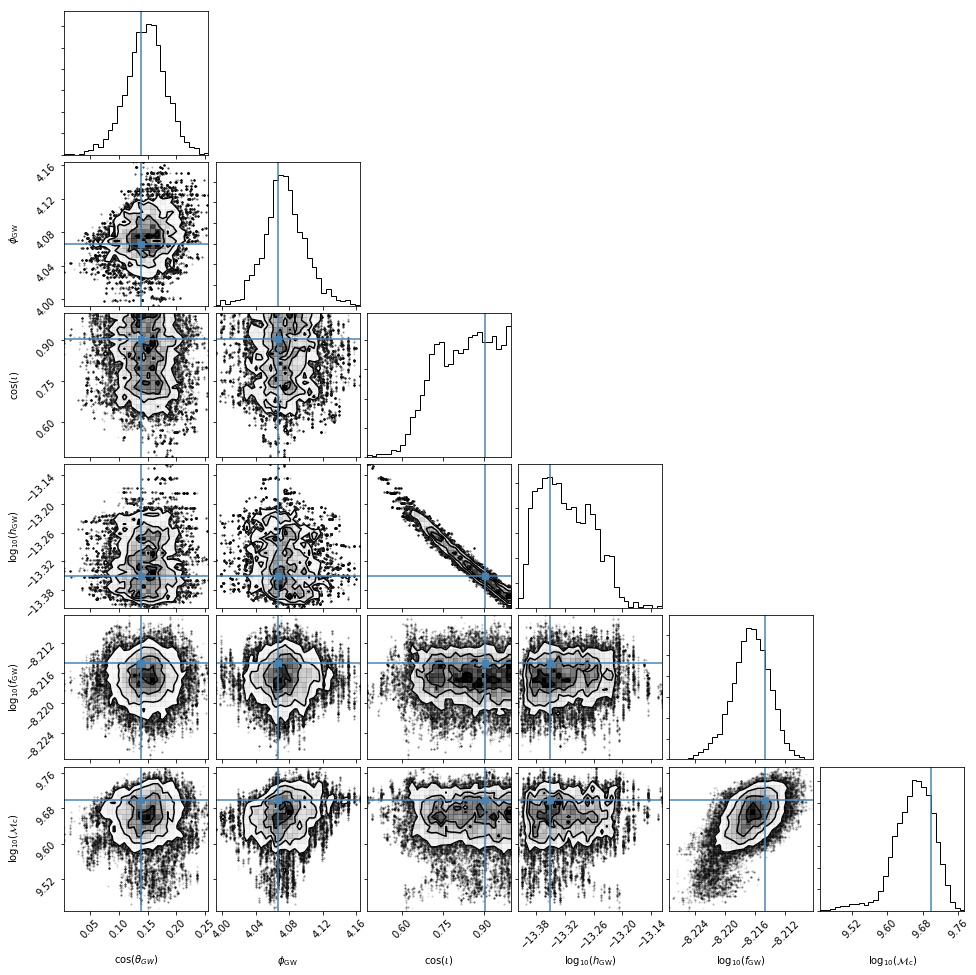

In [36]:
#CW corner plot
fig = corner.corner(chain_open_3b_cw_noise[burn_open_3b_cw_noise:,cw_indices_open_3b_noise], bins = 30, labels = printed_cw_params,truths=truth_values)
#SaveFigure(fig,'open_3b_cw_correct_noise_final.pdf')

# Open 3b Sampling All Noise

In [37]:
start_idx = len(param_dict_open_3b_cw_noise_sampled)-len(all_cw_params)
cw_indices_open_3b_noise_sampled = [start_idx,start_idx+3, start_idx+1,start_idx+5,start_idx+4,start_idx+6]

In [38]:
for idx in cw_indices_open_3b_noise_sampled:
    print(param_dict_open_3b_cw_noise_sampled[idx])

cos_gwtheta
gwphi
cos_inc
log10_h
log10_fgw
log10_mc


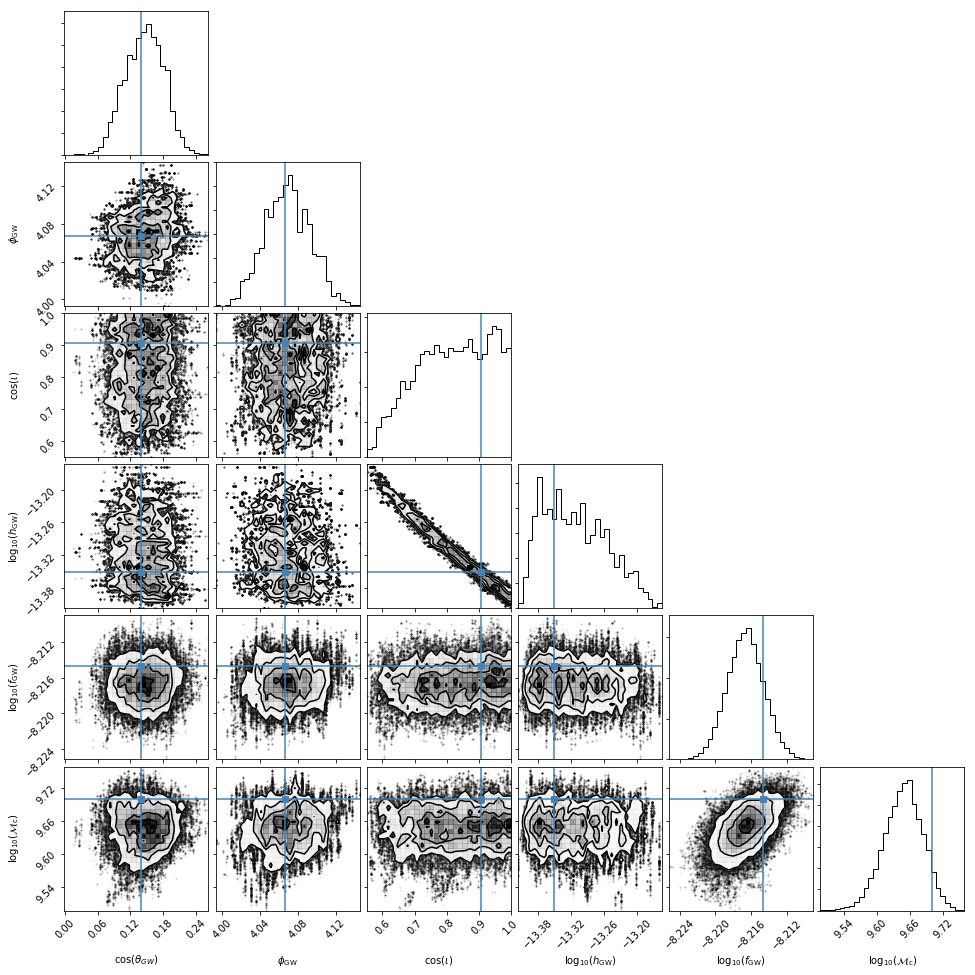

In [39]:
#CW corner plot
fig = corner.corner(chain_open_3b_cw_noise_sampled[burn_open_3b_cw_noise_sampled:,cw_indices_open_3b_noise_sampled], bins = 30, labels = printed_cw_params,truths=truth_values)
#SaveFigure(fig,'open_3b_cw_sample_all_noise_final.pdf')

# Open 3b Fixed WN Sample w/out CW (Wrong, sad :/ )

In [40]:
start_idx = len(param_dict_open_3b_wrong_noise)-len(all_cw_params)
cw_indices_open_3b_wrong_noise = [start_idx,start_idx+3, start_idx+1,start_idx+5,start_idx+4,start_idx+6]

In [41]:
for idx in cw_indices_open_3b_wrong_noise:
    print(param_dict_open_3b_wrong_noise[idx])

cos_gwtheta
gwphi
cos_inc
log10_h
log10_fgw
log10_mc


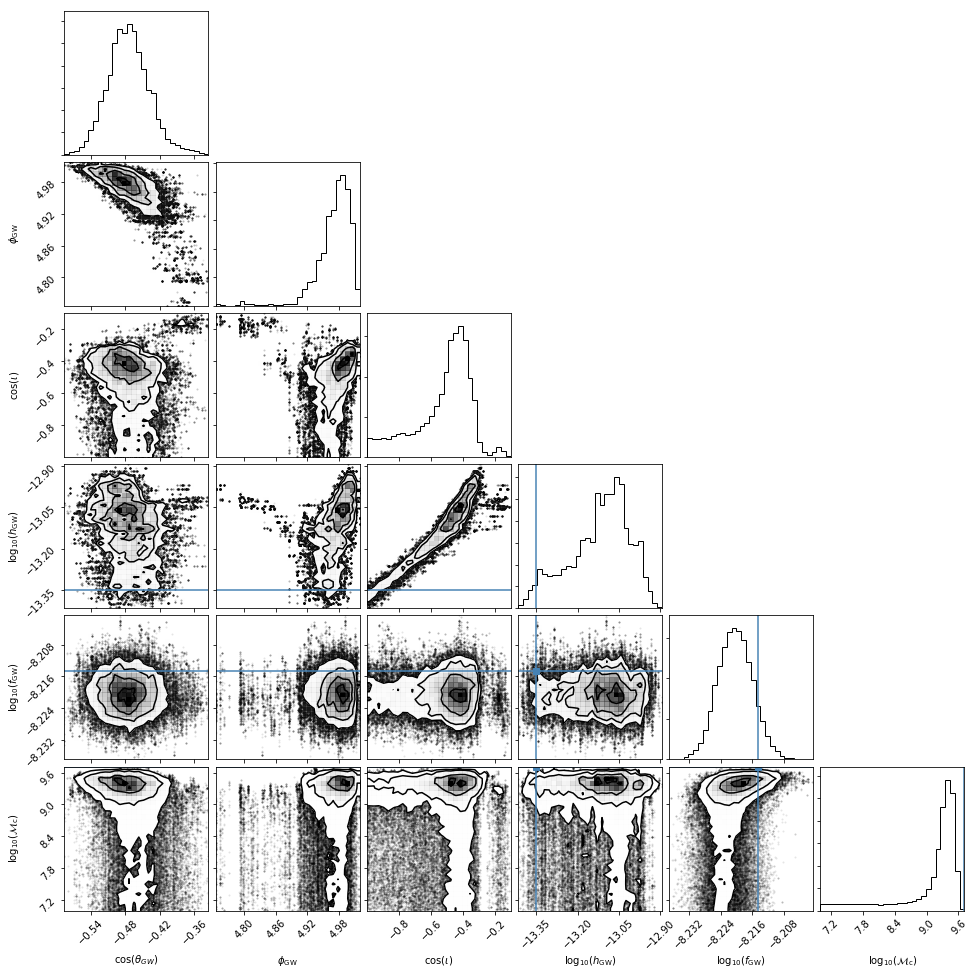

In [42]:
#CW corner plot
fig = corner.corner(chain_open_3b_wrong_noise[burn_open_3b_wrong_noise:,cw_indices_open_3b_wrong_noise], bins = 30, labels = printed_cw_params,truths=truth_values)
#SaveFigure(fig,'open_3b_cw_wrong_noise_final.pdf')

# Closed 1

In [43]:
start_idx = len(param_dict_closed_1_cw_noise)-len(all_cw_params)
cw_indices_closed_1_cw_noise = [start_idx,start_idx+3, start_idx+1,start_idx+5,start_idx+4,start_idx+6]

In [44]:
for idx in cw_indices_closed_1_cw_noise:
    print(param_dict_closed_1_cw_noise[idx])

cos_gwtheta
gwphi
cos_inc
log10_h
log10_fgw
log10_mc


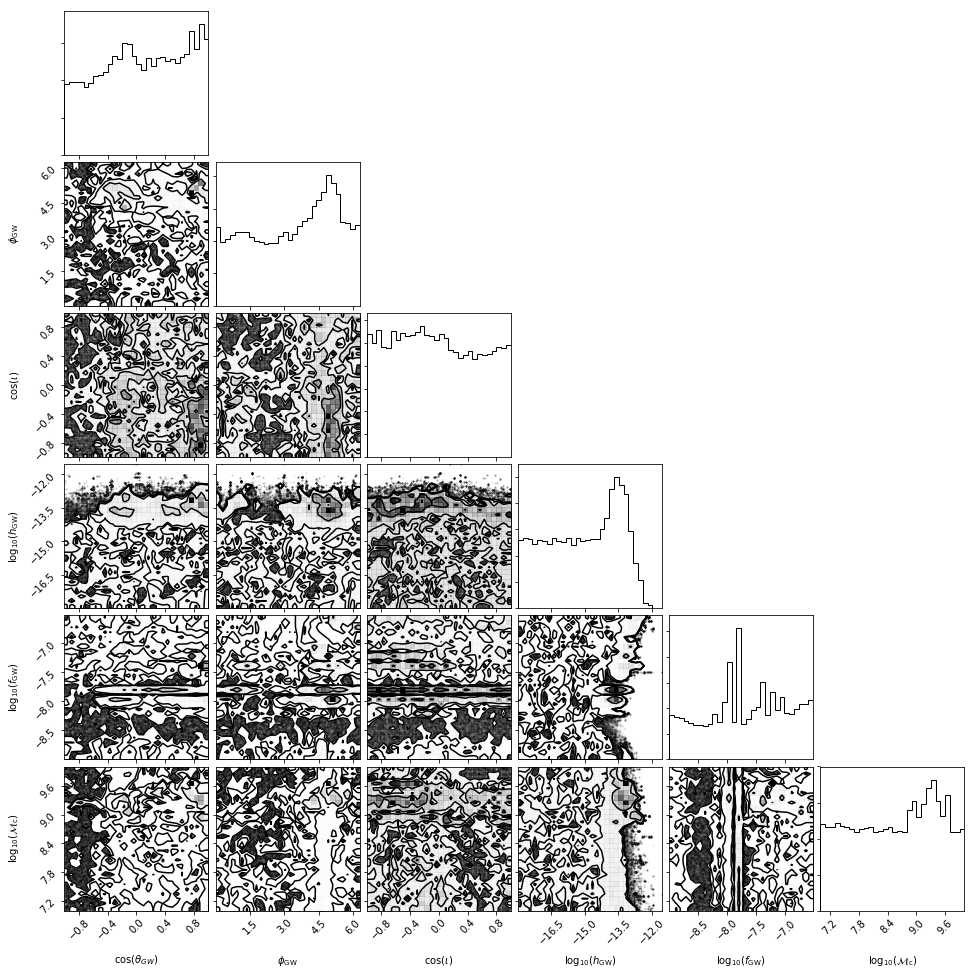

In [45]:
#CW corner plot
fig = corner.corner(chain_closed_1_cw_noise[burn_closed_1_cw_noise:,cw_indices_closed_1_cw_noise],\
                    bins = 30, labels = printed_cw_params)
#SaveFigure(fig,'closed_1_cw_final.pdf')

# Closed 2

In [46]:
start_idx = len(param_dict_closed_2_cw_noise)-len(all_cw_params)
cw_indices_closed_2_cw_noise = [start_idx,start_idx+3, start_idx+1,start_idx+5,start_idx+4,start_idx+6]

In [47]:
for idx in cw_indices_closed_2_cw_noise:
    print(param_dict_closed_2_cw_noise[idx])

cos_gwtheta
gwphi
cos_inc
log10_h
log10_fgw
log10_mc


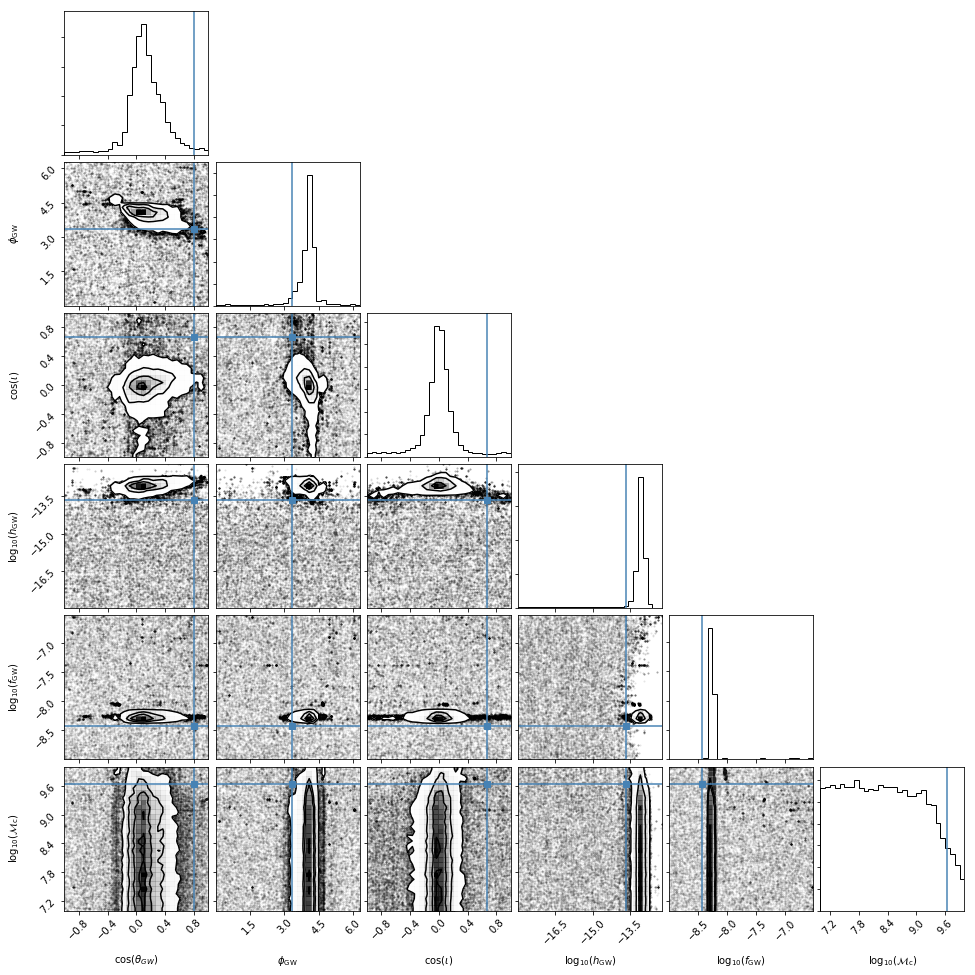

In [61]:
#CW corner plot
fig = corner.corner(chain_closed_2_cw_noise[burn_closed_2_cw_noise:,cw_indices_closed_2_cw_noise],\
                    bins = 30, labels = printed_cw_params,truths=truth_values_closed_2)
#SaveFigure(fig,'closed_2_cw.pdf')

# Closed 3 Double CW

In [49]:
double_cw_params = ['cos_gwtheta', 'gwphi', 'cos_inc', 'log10_h', 'log10_fgw', 'log10_mc']
start_idx = len(param_dict_closed_3_double)-2*len(double_cw_params)-4


cw_indices_closed_3_double_1 = []
cw_indices_closed_3_double_2 = []

for cw_param in double_cw_params:
    i = start_idx
    for param in param_dict_closed_3_double[start_idx:]:
        if param == cw_param+'_1' or param == cw_param+'_2':
            split_param = param.split('_')
            if split_param[-1] == '1':
                cw_indices_closed_3_double_1.append(i)
            if split_param[-1] == '2':
                cw_indices_closed_3_double_2.append(i)
        i+=1

In [69]:
print(cw_indices_closed_3_double_1)
for i in cw_indices_closed_3_double_1:
    print(param_dict_closed_3_double[i])

[198, 202, 200, 206, 204, 208]
cos_gwtheta_1
gwphi_1
cos_inc_1
log10_h_1
log10_fgw_1
log10_mc_1


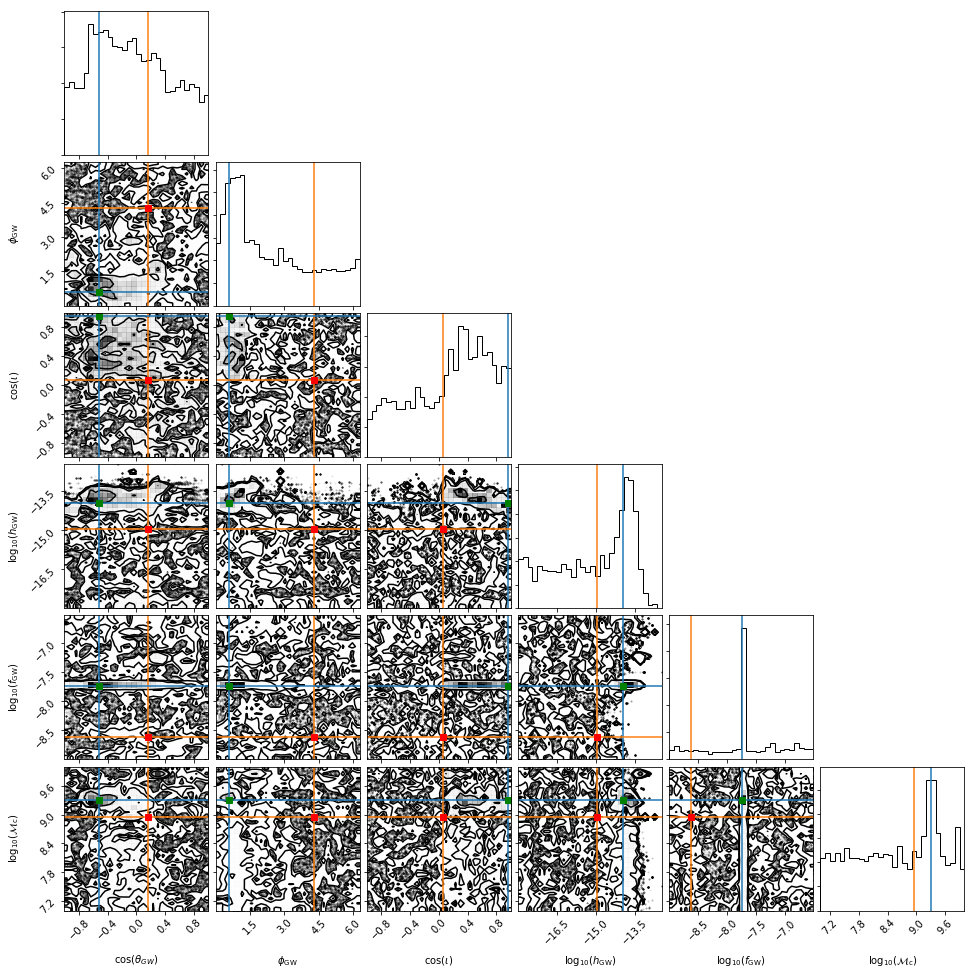

In [75]:
#CW corner plot
ndim = 6
color1 = 'C0'
color2 = 'C1'
fig = corner.corner(chain_closed_3_double[burn_closed_3_double:,cw_indices_closed_3_double_1],\
                    bins = 30, labels = printed_cw_params)

# Extract the axes
axes = np.array(fig.axes).reshape((ndim, ndim))

# Loop over the diagonal
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(truth_values_closed_3_1[i], color=color1)
    ax.axvline(truth_values_closed_3_2[i], color=color2)

# Loop over the histograms
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(truth_values_closed_3_1[xi], color=color1)
        ax.axvline(truth_values_closed_3_2[xi], color=color2)
        ax.axhline(truth_values_closed_3_1[yi], color=color1)
        ax.axhline(truth_values_closed_3_2[yi], color=color2)
        ax.plot(truth_values_closed_3_1[xi], truth_values_closed_3_1[yi], "sg")
        ax.plot(truth_values_closed_3_2[xi], truth_values_closed_3_2[yi], "sr")
        
#SaveFigure(fig,'closed_3_cw_1.pdf')
plt.show()

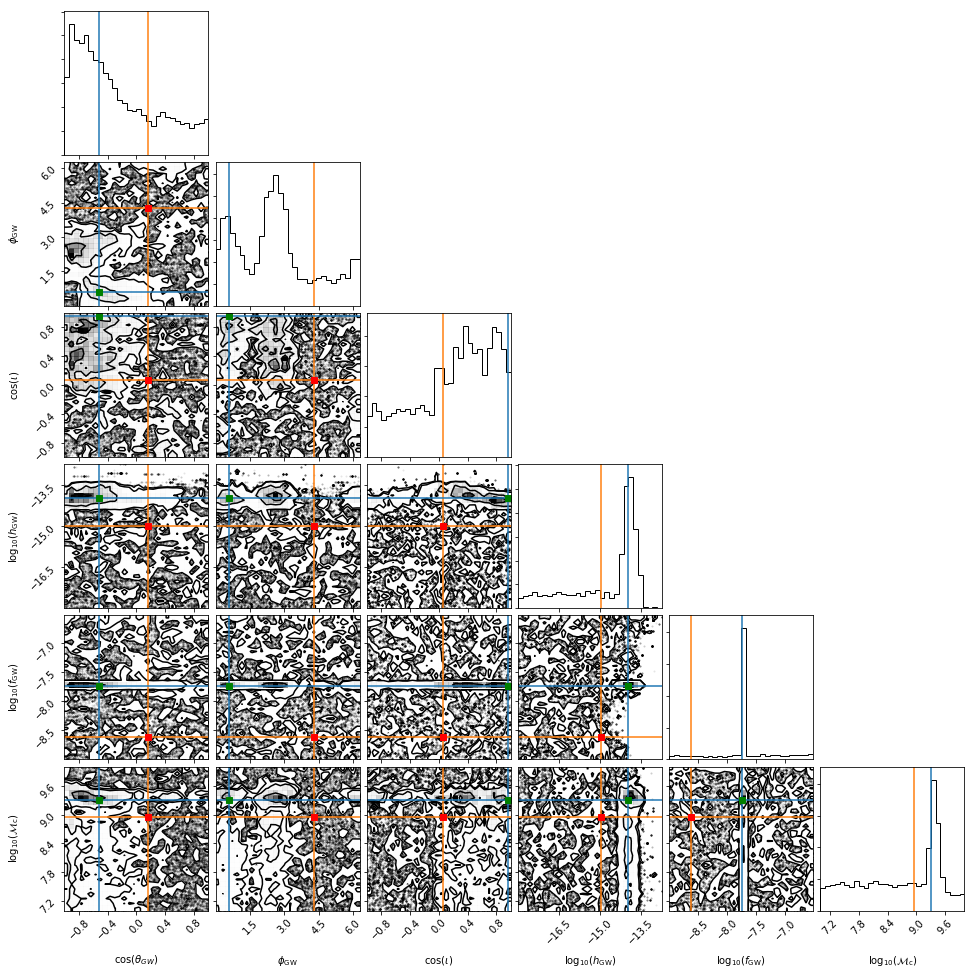

In [76]:
#CW corner plot
ndim = 6
color1 = 'C0'
color2 = 'C1'

fig = corner.corner(chain_closed_3_double[burn_closed_3_double:,cw_indices_closed_3_double_2],\
                    bins = 30, labels = printed_cw_params)
# Extract the axes
axes = np.array(fig.axes).reshape((ndim, ndim))

# Loop over the diagonal
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(truth_values_closed_3_1[i], color=color1)
    ax.axvline(truth_values_closed_3_2[i], color=color2)

# Loop over the histograms
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(truth_values_closed_3_1[xi], color=color1)
        ax.axvline(truth_values_closed_3_2[xi], color=color2)
        ax.axhline(truth_values_closed_3_1[yi], color=color1)
        ax.axhline(truth_values_closed_3_2[yi], color=color2)
        ax.plot(truth_values_closed_3_1[xi], truth_values_closed_3_1[yi], "sg")
        ax.plot(truth_values_closed_3_2[xi], truth_values_closed_3_2[yi], "sr")
        
#SaveFigure(fig,'closed_3_cw_2.pdf')
plt.show()

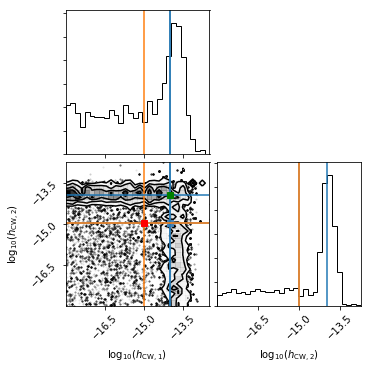

In [120]:
strain_indices = [cw_indices_closed_3_double_1[3],cw_indices_closed_3_double_2[3]]
truths = [truth_values_closed_3_1[3],truth_values_closed_3_2[3]]
labels = [r'${\rm log}_{10}(h_{\mathrm{CW},1})$',r'${\rm log}_{10}(h_{\mathrm{CW},2})$']


fig = corner.corner(chain_closed_3_double[burn_closed_3_double:,strain_indices],
                    bins = 30, labels = labels,truths=truths)

ndim = 2
color1 = 'C0'
color2 = 'C1'
# Extract the axes
axes = np.array(fig.axes).reshape((ndim, ndim))

# Loop over the diagonal
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(truths[0], color=color1)
    ax.axvline(truths[1], color=color2)

# Loop over the histograms
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(truths[0], color=color1)
        ax.axvline(truths[1], color=color2)
        ax.axhline(truths[0], color=color1)
        ax.axhline(truths[1], color=color2)
        ax.plot(truths[0], truths[0], "sg")
        ax.plot(truths[1], truths[1], "sr")
        
#SaveFigure(fig,'closed_3_cw_strains.pdf')
plt.show()